In [1]:
from DataParser import DataParser
import numpy as np
import scipy.sparse as sps

from Data_manager.split_functions.split_train_validation_random_holdout import \
split_train_in_two_percentage_global_sample

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from SimpleEvaluator import evaluator
from Base.Evaluation.Evaluator import EvaluatorHoldout

In [2]:
from Base.NonPersonalizedRecommender import TopPop, Random
from Hybrid.HybridCombinationSearch import HybridCombinationMergedSearch,HybridCombinationSearch
from KNN.ItemKNNCBFRecommender import ItemKNNCBFRecommender
from KNN.UserKNNCFRecommender import UserKNNCFRecommender
from KNN.ItemKNNCFRecommender import ItemKNNCFRecommender
from MatrixFactorization.IALSRecommender import IALSRecommender
from SLIM_BPR.Cython.SLIM_BPR_Cython import SLIM_BPR_Cython
from SLIM_ElasticNet.SLIMElasticNetRecommender import SLIMElasticNetRecommender
from SLIM_ElasticNet.SSLIM_ElasticNet import SSLIMElasticNet
from GraphBased.P3alphaRecommender import P3alphaRecommender
from GraphBased.RP3betaRecommender import RP3betaRecommender
from MatrixFactorization.Cython.MatrixFactorization_Cython import MatrixFactorization_BPR_Cython, MatrixFactorization_FunkSVD_Cython
from MatrixFactorization.PureSVDRecommender import PureSVDRecommender, PureSVDItemRecommender
from MatrixFactorization.NMFRecommender import NMFRecommender

In [3]:
seed = 1205
parser = DataParser()

URM_all = parser.get_URM_all()
ICM_all = parser.get_ICM_all()

URM_train, URM_test = split_train_in_two_percentage_global_sample(URM_all, train_percentage=0.9, seed=seed)

In [4]:
rp3b = RP3betaRecommender(URM_train, verbose=False)
rp3b_params = {'topK': 1000, 'alpha': 0.38192761611274967, 'beta': 0.0, 'normalize_similarity': False}
try:
    rp3b.load_model(f'stored_recommenders/seed_{str(seed)}_{rp3b.RECOMMENDER_NAME}/','for_notebook_analysis')
    print(f"{rp3b.RECOMMENDER_NAME} loaded.")
except:
    print(f"Fitting {rp3b.RECOMMENDER_NAME} ...")
    rp3b.fit(**rp3b_params)
    print(f"done.")
    rp3b.save_model(f'stored_recommenders/seed_{str(seed)}_{rp3b.RECOMMENDER_NAME}/','for_notebook_analysis')

p3a = P3alphaRecommender(URM_train, verbose=False)
p3a_params = {'topK': 131, 'alpha': 0.33660811631883863, 'normalize_similarity': False}
try:
    p3a.load_model(f'stored_recommenders/seed_{str(seed)}_{p3a.RECOMMENDER_NAME}/','for_notebook_analysis')
    print(f"{p3a.RECOMMENDER_NAME} loaded.")
except:
    print(f"Fitting {p3a.RECOMMENDER_NAME} ...")
    p3a.fit(**p3a_params)
    print(f"done.")
    p3a.save_model(f'stored_recommenders/seed_{str(seed)}_{p3a.RECOMMENDER_NAME}/','for_notebook_analysis')


icf = ItemKNNCFRecommender(URM_train, verbose=False)
icf_params = {'topK': 55, 'shrink': 1000, 'similarity': 'asymmetric', 'normalize': True, 'asymmetric_alpha': 0.0}
try:
    icf.load_model(f'stored_recommenders/seed_{str(seed)}_{icf.RECOMMENDER_NAME}/','for_notebook_analysis')
    print(f"{icf.RECOMMENDER_NAME} loaded.")
except:
    print(f"Fitting {icf.RECOMMENDER_NAME} ...")
    icf.fit(**icf_params)
    print(f"done.")
    icf.save_model(f'stored_recommenders/seed_{str(seed)}_{icf.RECOMMENDER_NAME}/','for_notebook_analysis')
    
ucf = UserKNNCFRecommender(URM_train, verbose=False)
ucf_params = {'topK': 190, 'shrink': 0, 'similarity': 'cosine', 'normalize': True}
try:
    ucf.load_model(f'stored_recommenders/seed_{str(seed)}_{ucf.RECOMMENDER_NAME}/','for_notebook_analysis')
    print(f"{ucf.RECOMMENDER_NAME} loaded.")
except:
    print(f"Fitting {ucf.RECOMMENDER_NAME} ...")
    ucf.fit(**ucf_params)
    print(f"done.")
    ucf.save_model(f'stored_recommenders/seed_{str(seed)}_{ucf.RECOMMENDER_NAME}/','for_notebook_analysis')

icb = ItemKNNCBFRecommender(URM_train, ICM_all, verbose=False)
icb_params = {'topK': 65, 'shrink': 0, 'similarity': 'dice', 'normalize': True}
try:
    icb.load_model(f'stored_recommenders/seed_{str(seed)}_{icb.RECOMMENDER_NAME}/','for_notebook_analysis')
    print(f"{icb.RECOMMENDER_NAME} loaded.")
except:
    print(f"Fitting {icb.RECOMMENDER_NAME} ...")
    icb.fit(**icb_params)
    print(f"done.")
    icb.save_model(f'stored_recommenders/seed_{str(seed)}_{icb.RECOMMENDER_NAME}/','for_notebook_analysis')

sen = SLIMElasticNetRecommender(URM_train, verbose=False)
sen_params = {'topK': 992, 'l1_ratio': 0.004065081925341167, 'alpha': 0.003725005053334143}
try:
    sen.load_model(f'stored_recommenders/seed_{str(seed)}_{sen.RECOMMENDER_NAME}/','for_notebook_analysis')
    print(f"{sen.RECOMMENDER_NAME} loaded.")
except:
    print(f"Fitting {sen.RECOMMENDER_NAME} ...")
    sen.fit(**sen_params)
    print(f"done.")
    sen.save_model(f'stored_recommenders/seed_{str(seed)}_{sen.RECOMMENDER_NAME}/','for_notebook_analysis')

sbpr = SLIM_BPR_Cython(URM_train, verbose=False)
sbpr_params = {'topK': 979, 'epochs': 130, 'symmetric': False, 'sgd_mode': 'adam', 'lambda_i': 0.004947329669424629, 'lambda_j': 1.1534760845071758e-05, 'learning_rate': 0.0001}
try:
    sbpr.load_model(f'stored_recommenders/seed_{str(seed)}_{sbpr.RECOMMENDER_NAME}/','for_notebook_analysis')
    print(f"{sbpr.RECOMMENDER_NAME} loaded.")
except:
    print(f"Fitting {sbpr.RECOMMENDER_NAME} ...")
    sbpr.fit(**sbpr_params)
    print(f"done.")
    sbpr.save_model(f'stored_recommenders/seed_{str(seed)}_{sbpr.RECOMMENDER_NAME}/','for_notebook_analysis')

sslim = SSLIMElasticNet(URM_train, ICM_all, verbose=False)
sslim_params = {'beta': 0.4849594591575789, 'topK': 1000, 'l1_ratio': 1e-05, 'alpha': 0.001}
try:
    sslim.load_model(f'stored_recommenders/seed_{str(seed)}_{sslim.RECOMMENDER_NAME}/','for_notebook_analysis')
    print(f"{sslim.RECOMMENDER_NAME} loaded.")
except:
    print(f"Fitting {sslim.RECOMMENDER_NAME} ...")
    sslim.fit(**sslim_params)
    print(f"done.")
    sslim.save_model(f'stored_recommenders/seed_{str(seed)}_{sslim.RECOMMENDER_NAME}/','for_notebook_analysis')


RP3betaRecommender loaded.
P3alphaRecommender loaded.
ItemKNNCFRecommender loaded.
UserKNNCFRecommender loaded.
ItemKNNCBFRecommender loaded.
SLIMElasticNetRecommender loaded.
SLIM_BPR_Recommender loaded.
S-SLIMElasticNet loaded.


### MERGED COMBO

In [5]:
merged_labels={
    'merged1': 'p3a_icb_icf',
    'merged2': 'p3a_rp3b_icb',
    'merged3': 'p3a_rp3b_icf',
    'merged4': 'rp3b_icb_icf',
    
    'merged5': 'sslim_icb_icf',
    'merged6': 'sslim_p3a_icb',
    'merged7': 'sslim_p3a_icf',
    'merged8': 'sslim_p3a_rp3b',
    'merged9': 'sslim_rp3b_icb',
    'merged10': 'sslim_rp3b_icf',
    
    'merged11': 'sen_icb_icf',
    'merged12': 'sen_p3a_icb',
    'merged13': 'sen_p3a_icf',
    'merged14': 'sen_p3a_rp3b',
    'merged15': 'sen_rp3b_icb',
    'merged16': 'sen_rp3b_icf',
}

In [6]:
evaluator_test = EvaluatorHoldout(URM_test, cutoff_list=[10])

In [7]:
list_recommender = [p3a, icb, icf]
merged1 = HybridCombinationMergedSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.7200604049942364, 'l1_ratio': 0.7140395502399722, 'topK': 960}
merged1.fit(**params)
result, _ = evaluator_test.evaluateRecommender(merged1)
result[10]['MAP']

HybridCombinationMergedSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationMergedSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 2.97 sec. Users per second: 1381


0.07115703869810794

In [8]:
list_recommender = [p3a, rp3b, icb]
merged2 = HybridCombinationMergedSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.7569952781664187, 'l1_ratio': 1.0, 'topK': 1000}
merged2.fit(**params)
result, _ = evaluator_test.evaluateRecommender(merged2)
result[10]['MAP']

HybridCombinationMergedSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationMergedSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 2.68 sec. Users per second: 1532


0.07301624314416995

In [9]:
list_recommender = [p3a, rp3b, icf]
merged3 = HybridCombinationMergedSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.9778642425266775, 'l1_ratio': 0.47133082953138095, 'topK': 325}
merged3.fit(**params)
result, _ = evaluator_test.evaluateRecommender(merged3)
result[10]['MAP']

HybridCombinationMergedSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationMergedSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 2.86 sec. Users per second: 1435


0.0653020617760733

In [10]:
list_recommender = [rp3b, icb, icf]
merged4 = HybridCombinationMergedSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.7276553525851246, 'l1_ratio': 0.6891035546237165, 'topK': 1000}
merged4.fit(**params)
result, _ = evaluator_test.evaluateRecommender(merged4)
result[10]['MAP']

HybridCombinationMergedSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationMergedSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 3.13 sec. Users per second: 1313


0.07294046686344241

In [11]:
list_recommender = [sslim, icb, icf]
merged5 = HybridCombinationMergedSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.6872557307018056, 'l1_ratio': 0.76541566567957, 'topK': 1000}
merged5.fit(**params)
result, _ = evaluator_test.evaluateRecommender(merged5)
result[10]['MAP']

HybridCombinationMergedSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationMergedSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.21 sec. Users per second: 976


0.07395349516473071

In [12]:
list_recommender = [sslim, p3a, icb]
merged6 = HybridCombinationMergedSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.859343616443417, 'l1_ratio': 0.8995038091652459, 'topK': 900}
merged6.fit(**params)
result, _ = evaluator_test.evaluateRecommender(merged6)
result[10]['MAP']

HybridCombinationMergedSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationMergedSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 3.93 sec. Users per second: 1045


0.07693455065542647

In [13]:
list_recommender = [sslim, p3a, icf]
merged7 = HybridCombinationMergedSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.859343616443417, 'l1_ratio': 0.8995038091652459, 'topK': 900}
merged7.fit(**params)
result, _ = evaluator_test.evaluateRecommender(merged7)
result[10]['MAP']

HybridCombinationMergedSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationMergedSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 3.94 sec. Users per second: 1042


0.07121420428682733

In [14]:
list_recommender = [sslim, p3a, rp3b]
merged8 = HybridCombinationMergedSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.9400802859734554, 'l1_ratio': 0.9587684622302801, 'topK': 994}
merged8.fit(**params)
result, _ = evaluator_test.evaluateRecommender(merged8)
result[10]['MAP']

HybridCombinationMergedSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationMergedSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.06 sec. Users per second: 1011


0.07267760953987402

In [15]:
list_recommender = [sslim, rp3b, icb]
merged9 = HybridCombinationMergedSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.7958495250555339, 'l1_ratio': 0.568253896500783, 'topK': 1000}
merged9.fit(**params)
result, _ = evaluator_test.evaluateRecommender(merged9)
result[10]['MAP']

HybridCombinationMergedSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationMergedSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.12 sec. Users per second: 997


0.07676832071023634

In [16]:
list_recommender = [sslim, rp3b, icf]
merged10 = HybridCombinationMergedSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.981619721036961, 'l1_ratio': 0.9649738006659417, 'topK': 983}
merged10.fit(**params)
result, _ = evaluator_test.evaluateRecommender(merged10)
result[10]['MAP']

HybridCombinationMergedSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationMergedSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.09 sec. Users per second: 1004


0.07214342600753734

In [17]:
list_recommender = [sen, icb, icf]
merged11 = HybridCombinationMergedSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.5899278771717852, 'l1_ratio': 0.6120627523522684, 'topK': 1000}
merged11.fit(**params)
result, _ = evaluator_test.evaluateRecommender(merged11)
result[10]['MAP']

HybridCombinationMergedSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationMergedSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 3.10 sec. Users per second: 1325


0.07173121012309597

In [18]:
list_recommender = [sen, p3a, icb]
merged12 = HybridCombinationMergedSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.7490340912348611, 'l1_ratio': 0.09196396781742812, 'topK': 651}
merged12.fit(**params)
result, _ = evaluator_test.evaluateRecommender(merged12)
result[10]['MAP']

HybridCombinationMergedSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationMergedSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 3.05 sec. Users per second: 1345


0.07298170105795547

In [19]:
list_recommender = [sen, p3a, icf]
merged13 = HybridCombinationMergedSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 1.0, 'l1_ratio': 0.0, 'topK': 1000}
merged13.fit(**params)
result, _ = evaluator_test.evaluateRecommender(merged13)
result[10]['MAP']

HybridCombinationMergedSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationMergedSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 2.55 sec. Users per second: 1609


0.06369466104485845

In [20]:
list_recommender = [sen, p3a, rp3b]
merged14 = HybridCombinationMergedSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.0, 'l1_ratio': 1.0, 'topK': 564}
merged14.fit(**params)
result, _ = evaluator_test.evaluateRecommender(merged14)
result[10]['MAP']

HybridCombinationMergedSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationMergedSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 2.94 sec. Users per second: 1395


0.06440223846660126

In [21]:
list_recommender = [sen, rp3b, icb]
merged15 = HybridCombinationMergedSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.7253584358056746, 'l1_ratio': 0.179704626734038, 'topK': 748}
merged15.fit(**params)
result, _ = evaluator_test.evaluateRecommender(merged15)
result[10]['MAP']

HybridCombinationMergedSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationMergedSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 3.10 sec. Users per second: 1325


0.0751107112375536

In [22]:
list_recommender = [sen, rp3b, icf]
merged16 = HybridCombinationMergedSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.6675597201916793, 'l1_ratio': 0.0, 'topK': 1000}
merged16.fit(**params)
result, _ = evaluator_test.evaluateRecommender(merged16)
result[10]['MAP']

HybridCombinationMergedSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationMergedSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 3.30 sec. Users per second: 1246


0.06314675411711827

---
## linear combo norm

In [23]:
combo_labels ={
    'combo1': 'icf_ucf_p3a', ###
    'combo2': 'icf_ucf_rp3b', ###
    'combo3': 'icf_p3a_rp3b', ###
    'combo4': 'ucf_p3a_rp3b', ### 
    'combo5': 'icb_icf_sen', ###
    'combo6': 'icf_sen_sbpr', ###
    'combo7': 'icb_icf_ucf', ###
    'combo8': 'icf_ucf_sen', ###
    'combo9': 'icb_p3a_sen', ###
    'combo10': 'icb_icf_p3a', ###
    'combo11': 'icf_p3a_sen', ### useless
    'combo12': 'p3a_sen_sbpr', ### useless
    'combo13': 'icb_ucf_p3a', ###
    'combo14': 'ucf_p3a_sen', ### useless
    'combo15': 'icb_rp3b_sen', ###
    'combo16': 'icb_icf_rp3b', ###
    'combo17': 'icf_rp3b_sen', ###
    'combo18': 'icb_p3a_rp3b', ###
    'combo19': 'rp3b_sen_sbpr', ### useless
    'combo20': 'icb_ucf_rp3b', ###
    'combo21': 'ucf_rp3b_sen', ###
    'combo22': 'icb_ucf_sen', ###
    'combo23': 'ucf_sen_sbpr', ###
    'combo24': 'icb_sen_sbpr', ###
    'combo25': 'icb_icf_sbpr', ###
    'combo26': 'icb_p3a_sbpr', ###
    'combo27': 'icb_rp3b_sbpr', ###
    'combo28': 'icb_ucf_sbpr', ###
    
    'combo29': 'sslim_icb_icf',
    'combo30': 'sslim_icb_ucf',
    'combo31': 'sslim_icf_ucf',
    'combo32': 'sslim_p3a_icb',
    'combo33': 'sslim_p3a_icf',
    'combo34': 'sslim_p3a_rp3b',
    'combo35': 'sslim_p3a_ucf',
    'combo36': 'sslim_rp3b_icb',
    'combo37': 'sslim_rp3b_icf',
    'combo38': 'sslim_rp3b_ucf',
}

In [24]:
list_recommender = [icf, ucf, p3a]
combo1 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.4318367153026247, 'l1_ratio': 0.06753630242082177}
combo1.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo1)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 3.95 sec. Users per second: 1041


0.06512626456474592

In [25]:
list_recommender = [icf, ucf, rp3b]
combo2 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.19390580434445875, 'l1_ratio': 0.2522643001286576}
combo2.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo2)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.33 sec. Users per second: 948


0.06421845647840414

In [26]:
list_recommender = [icf, p3a, rp3b]
combo3 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.13211292014716505, 'l1_ratio': 0.9841972871240037}
combo3.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo3)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.18 sec. Users per second: 983


0.06362883519800368

In [27]:
list_recommender = [ucf, p3a, rp3b]
combo4 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.9394644725243001, 'l1_ratio': 0.4569374184464653}
combo4.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo4)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.13 sec. Users per second: 994


0.0648004066187821

In [28]:
list_recommender = [icb, icf, sen]
combo5 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.5011523958099686, 'l1_ratio': 0.6835202748204333}
combo5.fit(**params)
result = evaluator(combo5, URM_test, cutoff=10)
result, _ = evaluator_test.evaluateRecommender(combo5)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.10 sec. Users per second: 1003


0.07336267663376782

In [29]:
list_recommender = [icf, sen, sbpr]
combo6 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.8434066208554849, 'l1_ratio': 0.4628304123637582}
combo6.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo6)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.59 sec. Users per second: 894


0.06433127799567438

In [30]:
list_recommender = [icb, icf, ucf]
combo7 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.23127746676269062, 'l1_ratio': 0.47037997538194565}
combo7.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo7)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 3.85 sec. Users per second: 1067


0.07308931554391875

In [31]:
list_recommender = [icf, ucf, sen]
combo8 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.8854496569140459, 'l1_ratio': 0.17103030574896252}
combo8.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo8)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.10 sec. Users per second: 1001


0.06429947212057584

In [32]:
list_recommender = [icb, p3a, sen]
combo9 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.9678477202248401, 'l1_ratio': 0.26287752701640094}
combo9.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo9)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.03 sec. Users per second: 1020


0.07163381537376169

In [33]:
list_recommender = [icb, icf, p3a]
combo10 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.27094237120805925, 'l1_ratio': 0.9998550263180496}
combo10.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo10)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 3.75 sec. Users per second: 1095


0.07140408738994852

In [34]:
list_recommender = [icf, p3a, sen]
combo11 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 1.0, 'l1_ratio': 0.0}
combo11.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo11)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 3.86 sec. Users per second: 1064


0.06369466104485845

In [35]:
list_recommender = [p3a, sen, sbpr]
combo12 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 1.0, 'l1_ratio': 1.0}
combo12.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo12)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.37 sec. Users per second: 939


0.06369466104485845

In [36]:
list_recommender = [icb, ucf, p3a]
combo13 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.4840277797811048, 'l1_ratio': 0.356265002578487}
combo13.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo13)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 3.82 sec. Users per second: 1074


0.07380966632291629

In [37]:
list_recommender = [ucf, p3a, sen]
combo14 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 1.0, 'l1_ratio': 0.0}
combo14.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo14)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 3.90 sec. Users per second: 1054


0.06369466104485845

In [38]:
list_recommender = [icb, rp3b, sen]
combo15 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.7389620492322015, 'l1_ratio': 0.3355244273594045}
combo15.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo15)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.30 sec. Users per second: 955


0.07494413405978635

In [39]:
list_recommender = [icb, icf, rp3b]
combo16 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.30215925285279965, 'l1_ratio': 0.48033878522040957}
combo16.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo16)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.12 sec. Users per second: 997


0.07274475570657978

In [40]:
list_recommender = [icf, rp3b, sen]
combo17 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.9949623682515907, 'l1_ratio': 0.007879399002699851}
combo17.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo17)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.32 sec. Users per second: 951


0.06415781016498168

In [41]:
list_recommender = [icb, p3a, rp3b]
combo18 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.32630431880229166, 'l1_ratio': 0.4598175570701317}
combo18.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo18)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.08 sec. Users per second: 1007


0.07299985414237488

In [42]:
list_recommender = [rp3b, sen, sbpr]
combo19 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 1.0, 'l1_ratio': 1.0}
combo19.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo19)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.77 sec. Users per second: 861


0.06309358676540552

In [43]:
list_recommender = [icb, ucf, rp3b]
combo20 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.39585017788453875, 'l1_ratio': 0.2969289208656836}
combo20.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo20)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.15 sec. Users per second: 990


0.0736875937075412

In [44]:
list_recommender = [ucf, rp3b, sen]
combo21 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.9824185519731099, 'l1_ratio': 0.0049365500554859896}
combo21.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo21)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.31 sec. Users per second: 952


0.06405673514918404

In [45]:
list_recommender = [icb, ucf, sen]
combo22 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.696288087190842, 'l1_ratio': 0.3051487184937027}
combo22.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo22)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.09 sec. Users per second: 1003


0.07454860156163984

In [46]:
list_recommender = [ucf, sen, sbpr]
combo23 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.9979141772440999, 'l1_ratio': 0.9695756615044695}
combo23.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo23)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.68 sec. Users per second: 878


0.06614775408097597

In [47]:
list_recommender = [icb, sen, sbpr]
combo24 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.7753869940322178, 'l1_ratio': 0.4380906766055395}
combo24.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo24)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.61 sec. Users per second: 890


0.0751415959913758

In [48]:
list_recommender = [icb, icf, sbpr]
combo25 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.8124123649444593, 'l1_ratio': 0.25648942001711633}
combo25.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo25)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.38 sec. Users per second: 937


0.06868809334814355

In [49]:
list_recommender = [icb, p3a, sbpr]
combo26 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.9966101776460795, 'l1_ratio': 0.24103276386735034}
combo26.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo26)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.40 sec. Users per second: 933


0.07113642234870157

In [50]:
list_recommender = [icb, rp3b, sbpr]
combo27 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.7781420779249448, 'l1_ratio': 0.27134602211348197}
combo27.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo27)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.73 sec. Users per second: 869


0.07191262460947638

In [51]:
list_recommender = [icb, ucf, sbpr]
combo28 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.8170261573317669, 'l1_ratio': 0.20761151334998523}
combo28.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo28)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.49 sec. Users per second: 914


0.07138969000897968

###### Linear combo with S-SLIM

In [52]:
list_recommender = [sslim, icb, icf]
combo29 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.996772013761913, 'l1_ratio': 0.7831508517025596}

combo29.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo29)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 6.00 sec. Users per second: 685


0.0757426537797741

In [53]:
list_recommender = [sslim, icb, ucf]
combo30 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.6461624491197696, 'l1_ratio': 0.7617220099582368}

combo30.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo30)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 6.03 sec. Users per second: 681


0.07698283769046922

In [54]:
list_recommender = [sslim, icf, ucf]
combo31 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.6418228871731989, 'l1_ratio': 1.0}

combo31.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo31)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 6.08 sec. Users per second: 676


0.07230107070971474

In [55]:
list_recommender = [sslim, p3a, icb]
combo32 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.8416340030829476, 'l1_ratio': 0.6651408407090509}

combo32.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo32)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 5.99 sec. Users per second: 685


0.07675357770744445

In [56]:
list_recommender = [sslim, p3a, icf]
combo33 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.9847198829156348, 'l1_ratio': 0.9996962519963414}

combo33.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo33)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 6.01 sec. Users per second: 684


0.07231991258329733

In [57]:
list_recommender = [sslim, p3a, rp3b]
combo34 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.9924434125443558, 'l1_ratio': 0.9904105385647505}

combo34.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo34)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 6.30 sec. Users per second: 652


0.07232996530005975

In [58]:
list_recommender = [sslim, p3a, ucf]
combo35 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.7021255257436378, 'l1_ratio': 0.8799646154792433}

combo35.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo35)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 6.48 sec. Users per second: 633


0.07287753339415531

In [59]:
list_recommender = [sslim, rp3b, icb]
combo36 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.8416340030829476, 'l1_ratio': 0.6651408407090509}

combo36.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo36)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 6.33 sec. Users per second: 649


0.07679706039972213

In [60]:
list_recommender = [sslim, rp3b, icf]
combo37 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.99818657042913, 'l1_ratio': 0.9852822057143448}

combo37.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo37)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 6.30 sec. Users per second: 652


0.07225193392514577

In [61]:
list_recommender = [sslim, rp3b, ucf]
combo38 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.6287606296404341, 'l1_ratio': 0.9991721235523667}

combo38.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo38)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 6.48 sec. Users per second: 634


0.07209747782589779

---
### USER WISE PLOTS

In [65]:
merged_hybrid = [merged1, merged2, merged3, merged4, merged5, merged6, merged7, merged8, merged9, merged10,
                 merged11, merged12, merged13, merged14, merged15, merged16]
combo_hybrid = [combo1, combo2, combo3, combo4, combo5, combo6, combo7, combo8, combo9, combo10,
                combo11, combo12, combo13, combo14, combo15, combo16, combo17, combo18, combo19, combo20,
                combo21, combo22, combo23, combo24, combo25, combo26, combo27, combo28, combo29, combo30,
                combo31, combo32, combo33, combo34, combo35, combo36, combo37, combo38]

In [66]:
num_merged = 16
num_combo = 38

In [67]:
f_ranges = [
    (0,3),
    (3,5),
    (5,10),
    (10,17),
    (17,30),
    (30,100),
    (100,200),
    (200,-1)
]
MAP_merged_per_group = []
MAP_combo_per_group = []
cutoff = 10

for f_range in f_ranges:
    URM_test_group = parser.filter_URM_test_by_range(URM_train, URM_test, f_range)
    evaluator_test = EvaluatorHoldout(URM_test_group, cutoff_list=[cutoff])
    
    merged_dict={}
    for i in range (num_merged):
        results, _ = evaluator_test.evaluateRecommender(merged_hybrid[i])
        key='merged'+str(i+1)
        merged_dict[key]=results[cutoff]["MAP"]
    
    MAP_merged_per_group.append(merged_dict)
 
    combo_dict={}
    for i in range (num_combo):
        results, _ = evaluator_test.evaluateRecommender(combo_hybrid[i])
        key='combo'+str(i+1)
        combo_dict[key]=results[cutoff]["MAP"]
    
    MAP_combo_per_group.append(combo_dict)

EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.36 sec. Users per second: 1566
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.34 sec. Users per second: 1660
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.39 sec. Users per second: 1459
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.36 sec. Users per second: 1556
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.45 sec. Users per second: 1254
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.44 sec. Users per second: 1290
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.44 sec. Users per second: 1284
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.45 sec. Users per second: 1263
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.45 sec. Users per second: 1256
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.45 sec. Users per second: 1264
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.35 sec. Users per second: 1602
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.35 sec. Users per second: 1607
EvaluatorHoldout: Processed 566 ( 100.00

EvaluatorHoldout: Processed 581 ( 100.00% ) in 0.68 sec. Users per second: 859
EvaluatorHoldout: Processed 581 ( 100.00% ) in 0.67 sec. Users per second: 867
EvaluatorHoldout: Processed 581 ( 100.00% ) in 0.68 sec. Users per second: 858
EvaluatorHoldout: Processed 581 ( 100.00% ) in 0.68 sec. Users per second: 851
EvaluatorHoldout: Processed 581 ( 100.00% ) in 0.68 sec. Users per second: 858
EvaluatorHoldout: Processed 581 ( 100.00% ) in 0.68 sec. Users per second: 856
EvaluatorHoldout: Processed 581 ( 100.00% ) in 0.69 sec. Users per second: 842
EvaluatorHoldout: Processed 1027 ( 100.00% ) in 0.66 sec. Users per second: 1555
EvaluatorHoldout: Processed 1027 ( 100.00% ) in 0.65 sec. Users per second: 1592
EvaluatorHoldout: Processed 1027 ( 100.00% ) in 0.67 sec. Users per second: 1544
EvaluatorHoldout: Processed 1027 ( 100.00% ) in 0.70 sec. Users per second: 1458
EvaluatorHoldout: Processed 1027 ( 100.00% ) in 0.95 sec. Users per second: 1081
EvaluatorHoldout: Processed 1027 ( 100.00%

EvaluatorHoldout: Processed 676 ( 100.00% ) in 0.64 sec. Users per second: 1057
EvaluatorHoldout: Processed 676 ( 100.00% ) in 0.66 sec. Users per second: 1024
EvaluatorHoldout: Processed 676 ( 100.00% ) in 0.61 sec. Users per second: 1108
EvaluatorHoldout: Processed 676 ( 100.00% ) in 0.65 sec. Users per second: 1033
EvaluatorHoldout: Processed 676 ( 100.00% ) in 0.63 sec. Users per second: 1072
EvaluatorHoldout: Processed 676 ( 100.00% ) in 0.91 sec. Users per second: 745
EvaluatorHoldout: Processed 676 ( 100.00% ) in 0.92 sec. Users per second: 734
EvaluatorHoldout: Processed 676 ( 100.00% ) in 0.92 sec. Users per second: 732
EvaluatorHoldout: Processed 676 ( 100.00% ) in 0.90 sec. Users per second: 748
EvaluatorHoldout: Processed 676 ( 100.00% ) in 0.91 sec. Users per second: 745
EvaluatorHoldout: Processed 676 ( 100.00% ) in 0.94 sec. Users per second: 721
EvaluatorHoldout: Processed 676 ( 100.00% ) in 0.92 sec. Users per second: 735
EvaluatorHoldout: Processed 676 ( 100.00% ) in 

EvaluatorHoldout: Processed 522 ( 100.00% ) in 0.68 sec. Users per second: 773
EvaluatorHoldout: Processed 522 ( 100.00% ) in 0.60 sec. Users per second: 877
EvaluatorHoldout: Processed 522 ( 100.00% ) in 0.84 sec. Users per second: 620
EvaluatorHoldout: Processed 522 ( 100.00% ) in 0.61 sec. Users per second: 859
EvaluatorHoldout: Processed 522 ( 100.00% ) in 0.68 sec. Users per second: 770
EvaluatorHoldout: Processed 522 ( 100.00% ) in 0.60 sec. Users per second: 875
EvaluatorHoldout: Processed 522 ( 100.00% ) in 0.78 sec. Users per second: 669
EvaluatorHoldout: Processed 522 ( 100.00% ) in 0.77 sec. Users per second: 676
EvaluatorHoldout: Processed 522 ( 100.00% ) in 0.71 sec. Users per second: 737
EvaluatorHoldout: Processed 522 ( 100.00% ) in 0.70 sec. Users per second: 750
EvaluatorHoldout: Processed 522 ( 100.00% ) in 0.78 sec. Users per second: 666
EvaluatorHoldout: Processed 522 ( 100.00% ) in 0.71 sec. Users per second: 735
EvaluatorHoldout: Processed 522 ( 100.00% ) in 0.98 

EvaluatorHoldout: Processed 38 ( 100.00% ) in 0.13 sec. Users per second: 294
EvaluatorHoldout: Processed 38 ( 100.00% ) in 0.06 sec. Users per second: 595
EvaluatorHoldout: Processed 38 ( 100.00% ) in 0.08 sec. Users per second: 459
EvaluatorHoldout: Processed 38 ( 100.00% ) in 0.12 sec. Users per second: 313
EvaluatorHoldout: Processed 38 ( 100.00% ) in 0.10 sec. Users per second: 379
EvaluatorHoldout: Processed 38 ( 100.00% ) in 0.13 sec. Users per second: 298
EvaluatorHoldout: Processed 38 ( 100.00% ) in 0.11 sec. Users per second: 357
EvaluatorHoldout: Processed 38 ( 100.00% ) in 0.18 sec. Users per second: 208
EvaluatorHoldout: Processed 38 ( 100.00% ) in 0.09 sec. Users per second: 402
EvaluatorHoldout: Processed 38 ( 100.00% ) in 0.12 sec. Users per second: 325
EvaluatorHoldout: Processed 38 ( 100.00% ) in 0.09 sec. Users per second: 432
EvaluatorHoldout: Processed 38 ( 100.00% ) in 0.13 sec. Users per second: 302
EvaluatorHoldout: Processed 38 ( 100.00% ) in 0.13 sec. Users pe

In [68]:
def check_if_present(key_list, el):
    for key_val, combo_val in key_list:
        if key_val == el[0] and combo_val == el[1]:
            return True
    return False

In [69]:
to_be_plotted = []
for i in range(0, len (f_ranges)):
    print(f"RANGE {f_ranges[i]}")
    maxp = 0
    difference = 0
    old_name = ''
    max_name=''
    max_isCombo=None
    old_isCombo=None
    max_key=None
    old_key=None
    
    combo_dict = MAP_combo_per_group[i]
    for key in combo_dict:
        value = combo_dict[key]
        print(f"> MAP combo-{combo_labels[key]}:\t {value}")
        if value > maxp:
            difference=value - maxp
            maxp=value
            old_name=max_name
            old_isCombo=max_isCombo
            max_name=combo_labels[key]
            max_isCombo=True
            old_key=max_key
            max_key=key
   
    merged_dict = MAP_merged_per_group[i]
    for key in merged_dict:
        value = merged_dict[key]
        print(f"> MAP merged-{merged_labels[key]}:\t {value}")
        if value > maxp:
            difference=value - maxp
            maxp=value
            old_name=max_name
            old_isCombo=max_isCombo
            max_name=merged_labels[key]
            max_isCombo=False
            old_key=max_key
            max_key=key
            
    if not check_if_present(to_be_plotted, (max_key, max_isCombo)):
        to_be_plotted.append((max_key, max_isCombo))
    
    if not old_key is None and not check_if_present(to_be_plotted, (old_key, old_isCombo)):
        to_be_plotted.append((old_key, old_isCombo))
    
    
    print(f"Max MAP is {maxp} from {max_name}({'COMBO' if max_isCombo else 'MERGED'}) with difference from previous max of {difference} from {old_name}({'COMBO' if old_isCombo else 'MERGED'}) \n")
        

RANGE (0, 3)
> MAP combo-icf_ucf_p3a:	 0.06696568792416852
> MAP combo-icf_ucf_rp3b:	 0.06944128947220822
> MAP combo-icf_p3a_rp3b:	 0.06935470301194685
> MAP combo-ucf_p3a_rp3b:	 0.06838752874530261
> MAP combo-icb_icf_sen:	 0.07483243591900836
> MAP combo-icf_sen_sbpr:	 0.0644405416269374
> MAP combo-icb_icf_ucf:	 0.05942623908613309
> MAP combo-icf_ucf_sen:	 0.06561465870211454
> MAP combo-icb_p3a_sen:	 0.07850166862976055
> MAP combo-icb_icf_p3a:	 0.07880980425150037
> MAP combo-icf_p3a_sen:	 0.06497349823321558
> MAP combo-p3a_sen_sbpr:	 0.06497349823321558
> MAP combo-icb_ucf_p3a:	 0.08013804756295924
> MAP combo-ucf_p3a_sen:	 0.06497349823321558
> MAP combo-icb_rp3b_sen:	 0.07618591900835718
> MAP combo-icb_icf_rp3b:	 0.08200684278422796
> MAP combo-icf_rp3b_sen:	 0.06825817488361659
> MAP combo-icb_p3a_rp3b:	 0.0790075158449717
> MAP combo-rp3b_sen_sbpr:	 0.06681109428459255
> MAP combo-icb_ucf_rp3b:	 0.07977732907061533
> MAP combo-ucf_rp3b_sen:	 0.06804714229625893
> MAP comb

In [70]:
to_be_plotted

[('merged4', False),
 ('combo16', True),
 ('combo32', True),
 ('combo29', True),
 ('combo15', True),
 ('combo9', True),
 ('combo30', True),
 ('combo22', True),
 ('combo36', True),
 ('merged6', False),
 ('merged2', False)]

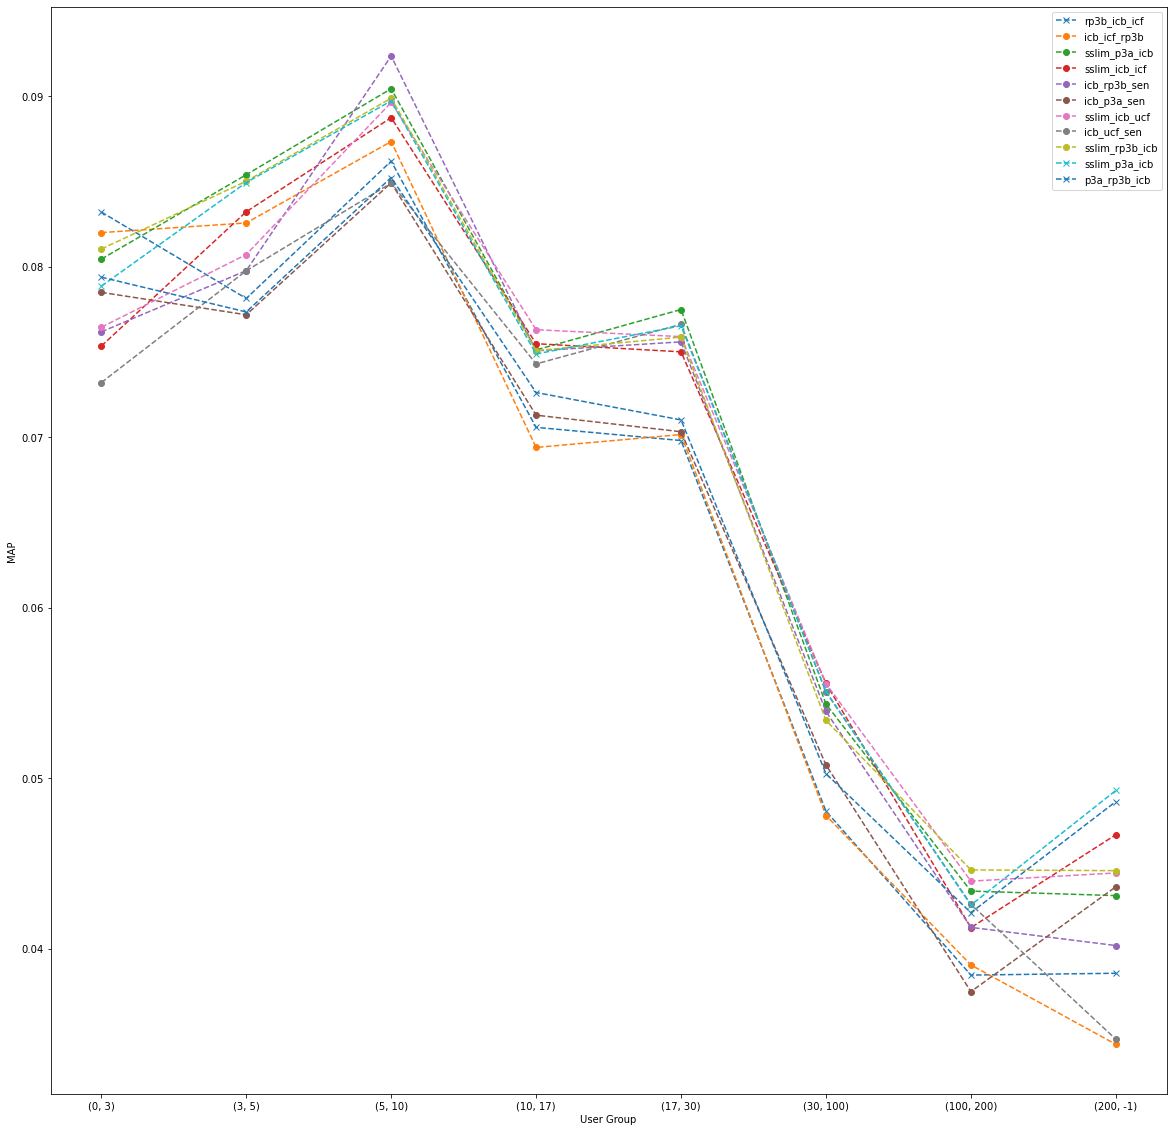

In [71]:
import matplotlib.pyplot as pyplot
%matplotlib inline  
pyplot.figure(figsize=(20,20))
for key, isCombo in to_be_plotted:
    l=[]
    if isCombo:
        for combo_dict in MAP_combo_per_group:
            l.append(combo_dict[key])
        style = '--o'
        label = combo_labels[key]
    else:
        for merged_dict in MAP_merged_per_group:
            l.append(merged_dict[key])
        style = '--x'
        label = merged_labels[key]
    pyplot.plot(l, style, label = label)

pyplot.xticks(ticks=range(0,len(f_ranges)), labels=f_ranges)
pyplot.ylabel('MAP')
pyplot.xlabel('User Group')
pyplot.legend()
pyplot.show()